In [6]:

import seaborn as sns
import pandas as pd
df = sns.load_dataset('titanic')
display(df.head())
display(df.info())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
# Identify categorical columns (excluding the target 'survived')
categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
# Remove target and related columns if they exist in the list
if 'survived' in categorical_features:
    categorical_features.remove('survived')
if 'alive' in categorical_features:
    categorical_features.remove('alive')
# Identify binary categorical columns for Label Encoding
binary_categorical_features = ['sex', 'adult_male', 'alone']
# Identify nominal categorical columns for One-Hot Encoding
nominal_categorical_features = [col for col in categorical_features if col not in binary_categorical_features]
# Apply Label Encoding to binary features
for col in binary_categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
# Apply One-Hot Encoding to nominal features
df = pd.get_dummies(df, columns=nominal_categorical_features, drop_first=True)
display(df.head())


,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,...,who_man,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,1,no,0,...,True,False,False,False,False,False,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,0,yes,0,...,False,True,False,True,False,False,False,False,False,False
2,1,3,0,26.0,0,0,7.9250,0,yes,1,...,False,True,False,False,False,False,False,False,False,True
3,1,1,0,35.0,1,0,53.1000,0,yes,0,...,False,True,False,True,False,False,False,False,False,True
4,0,3,1,35.0,0,0,8.0500,1,no,1,...,True,False,False,False,False,False,False,False,False,True


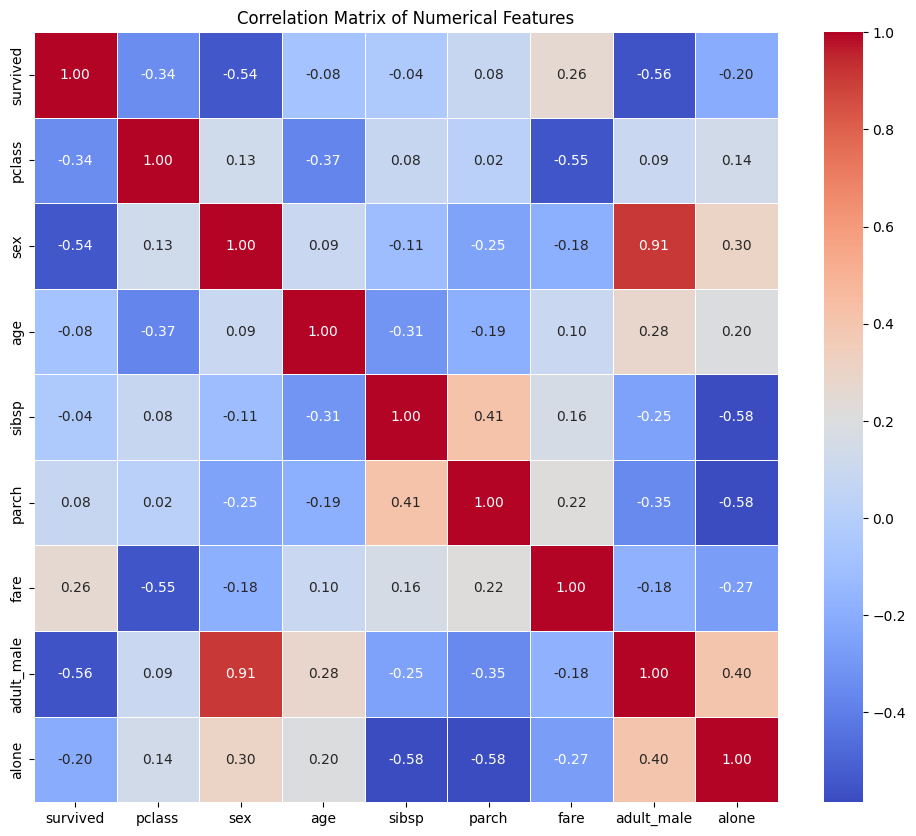

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [9]:
from sklearn.feature_selection import mutual_info_regression
# Separate features (X) and target (y)
X = numerical_df.drop('survived', axis=1)
y = numerical_df['survived']
# Calculate mutual information between each feature and the target
mutual_info = mutual_info_regression(X, y)
# Create a pandas Series for better visualization
mutual_info_series = pd.Series(mutual_info, index=X.columns)
# Sort the mutual information values and display
mutual_info_series.sort_values(ascending=False, inplace=True)
print("Mutual Information with 'survived':")
display(mutual_info_series)

ValueError: Input X contains NaN.

In [ ]:
from sklearn.feature_selection import f_classif
# Apply ANOVA F-test
f_values, p_values = f_classif(X, y)
# Create a pandas Series for better visualization
anova_results = pd.DataFrame({'F-value': f_values, 'P-value': p_values}, index=X.columns)
# Sort by F-value and display
anova_results.sort_values(by='F-value', ascending=False, inplace=True)
print("\nANOVA F-test Results with 'survived':")
display(anova_results)

In [10]:
# Combine 'year' and 'month' to create a datetime index
flights_df['date'] = pd.to_datetime(flights_df['year'].astype(str) + '-' + flights_df['month'].astype(str))
flights_df = flights_df.set_index('date')
flights_df['year'] = flights_df.index.year
flights_df['month'] = flights_df.index.month
flights_df['day_of_year'] = flights_df.index.dayofyear
flights_df['day_of_week'] = flights_df.index.dayofweek
flights_df['week_of_year'] = flights_df.index.isocalendar().week
flights_df['quarter'] = flights_df.index.quarter
display(flights_df.head())

NameError: name 'flights_df' is not defined